In [1]:
import io
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from pptx import Presentation
from pptx.util import Inches
from pptx.parts.image import Image
from pptx.shapes.picture import Picture

In [2]:
dists = {
    "A": stats.lognorm(0.78, loc=10),
    "B": stats.expon(2),
    "C": stats.norm(loc=50, scale=10)
}

In [3]:
history = {k: v.rvs(size=1000) for (k, v) in dists.items()}

In [4]:
results = {"A": 12.2, "B": 3.52, "C": 43}

In [5]:
data = pd.DataFrame(history)

In [6]:
presentation = Presentation()
title_slide_layout = presentation.slide_layouts[0]
slide = presentation.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "My Automatic Presentation"
subtitle.text = "Yeah, PowerPoint can be automated as well!"

In [7]:
bullet_slide_layout = presentation.slide_layouts[1]

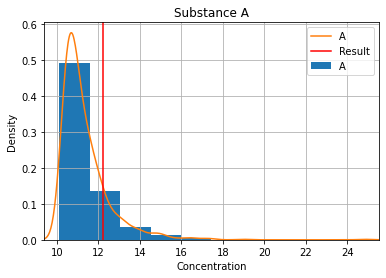

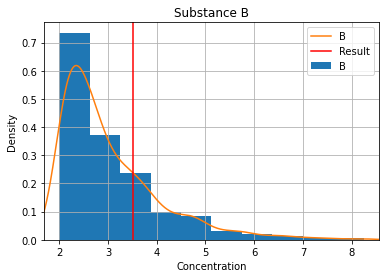

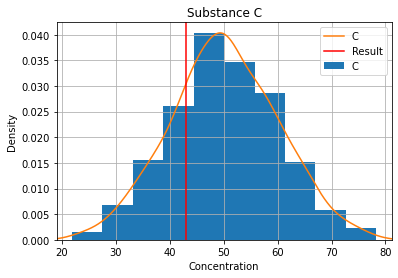

In [8]:
for key in results:
    
    # Prepare slide:
    slide = presentation.slides.add_slide(bullet_slide_layout)
    shapes = slide.shapes
    
    title_shape = shapes.title
    body_shape = shapes.placeholders[1]
    title_shape.text = 'About substance %s' % key
    
    
    tf = body_shape.text_frame
    tf.text = 'Key points about %s' % key

    p = tf.add_paragraph()
    p.text = 'Mainly...'
    p.level = 1

    p = tf.add_paragraph()
    p.text = 'Which is a concern'
    p.level = 2
    
    # Generate figure:
    fig, axe = plt.subplots()
    data[key].plot(kind="hist", density=1, ax=axe)
    xlim = axe.get_xlim()
    data[key].plot(kind="kde", ax=axe)
    axe.axvline(results[key], color="red", label="Result")
    axe.set_title("Substance %s" % key)
    axe.set_xlabel("Concentration")
    axe.set_xlim(xlim)
    axe.legend()
    axe.grid()
    
    # Create image for PPT:
    stream = io.BytesIO()
    fig.savefig(stream, format="png", dpi=180)
    image = Image(blob=stream, filename="dist_%s.png" % key)
    #picture = Picture(image, parent=slide)
    file = "dist_%s.png" % key
    fig.savefig(file)
    
    # Add picture to slide:
    left = Inches(3.80)
    top = Inches(2.90)
    pic = slide.shapes.add_picture(file, left, top)

In [9]:
presentation.save('test.pptx')